- In **late September 2016**, **scikit-learn version 0.18** was released.  
  A small change was made:
   * The `train_test_split` function is now imported from `model_selection` instead of `cross_validation`.

- Old code:  
    from sklearn.cross_validation import train_test_split

- New code:  
    from sklearn.model_selection import train_test_split

<br>

- **We'll use the new method**
  - using older method sends a **warning message** about the update.
  - The same change happened for `GridSearchCV` (covered later).




---

# 🎈 Introduction to Linear Regression

This introduction provides a light theoretical background and historical context for the idea of **linear regression** before exploring its implementation using Python and the scikit-learn library. 
- For deeper mathematical understanding: **Chapters 2 and 3 of *An Introduction to Statistical Learning*** By _Gareth James, et al_. 


### **History of Linear Regression (Regression to the Mean):**

* The concept of **regression** originated in the **1800s** with **Francis Galton**.

* Galton studied the relationship between **parents and their children**, focusing mainly on the **heights of fathers and their sons**.

* He observed that while **tall fathers usually had tall sons**, the sons' heights were typically **closer to the average height** of the general population, rather than exactly matching their fathers.

* This tendency for values to _move closer to the overall average_ is what Galton termed **“regression to the mean.”**

* His work laid the foundation for what we now call **linear regression**, a technique used to model the relationship between a _dependent variable_ and one or more _independent variables_.


* **Example:**  
  Consider **Shaquille O’Neal**, a famous NBA player known for being very tall — **7 ft 1 in (2.2 meters)**.

    * **If Shaq has a son**, it’s likely his son would also be tall because of genetics.

    * However, because **Shaq’s height is an extreme value (an outlier)**, there’s a good chance his son’s height would be **closer to the population average** rather than matching his father’s height.

    * In fact, **Shaq’s real son is 6 ft 7 in**, tall but still shorter than Shaq.

    * **Francis Galton called this phenomenon "regression"** — meaning that extreme characteristic (like very tall or very short heights) in parents tend to **move back toward the population average**.  
    
    * An extreme characteristic in one generation tends to move closer to the mean in subsequent generations.  

    * This example helps explain the basic idea of **"regression to the mean"** in statistics.


---

## ✅ REGRESSION  

  Let's Start with a Simple Example:

   * Imagine a regression with just **two data points**:
     $(x, y) = (2, 4) \text{ and } (5, 10)$

- **What Regression Tries to Do:**

   * The goal is to draw a **line as close as possible to all the points**.
   * In **linear regression (least squares method)**, closeness is measured only in the **vertical (up-down) direction**, not sideways.

- **With Two Points:**

   * The line will fit perfectly because two points always define a straight line.

- **Why Extend to More Points?**

   * If we had a larger dataset (like many fathers and sons’ heights), we could apply the same idea.
   * This would allow us to make useful predictions — for example, estimating a son's height based on his father’s height even before the son is born.

- This Idea is Called **Supervised Learning:**

   * We use **labeled data points** (inputs with known outputs) to **train a model**.
   * Once trained, the model can take **unlabeled data** (like a new father's height) and predict the corresponding output (expected son’s height).

- **In This Example:**

   * The model would predict **child’s height** (label) from **father’s height** (feature) using **linear regression**.


---

## ✅ Objective of Linear Regression  
The main goal of linear regression is to find a straight line that best represents the relationship between the input features (X) and the output labels (Y).

- What Does **Best** Mean?  
  **'Best'** means minimizing the **vertical distance** between the **_actual data points_** and the **_predicted values_** on the regression line.

- **Why Vertical Distance?**
  In classic linear regression, only the **vertical (Y-axis)** difference matters because we're predicting Y values from given X values.

- ### **How to Minimize This Distance?**  
  There are different ways to measure and minimize this distance between your line and the rest of the data points:

  * **Sum of Squared Errors (SSE)**
  * **Sum of Absolute Errors**
  * **Least Squares Method (most common)**

- ### What is the **Least Squares Method**?

  * __How it fits:__ The **Least Squares Method** minimizes the **sum of the squared residuals**.
  * A **residual** is the difference between an **_observed Y-value_** and its **_predicted Y-value_** on the regression line. Residuals are vertical distances from each data point to the line.

- **Why Square the Residuals?**
  * To avoid negatives canceling out positives.
  * Squaring emphasizes larger errors more than small ones.
  * These residuals are squared and summed, and the line that produces the smallest total is selected as the best fit.

- **Example**

  * Blue points represent actual data.
  * The diagonal black line is the regression line.
  * Vertical red lines represent residuals (errors).

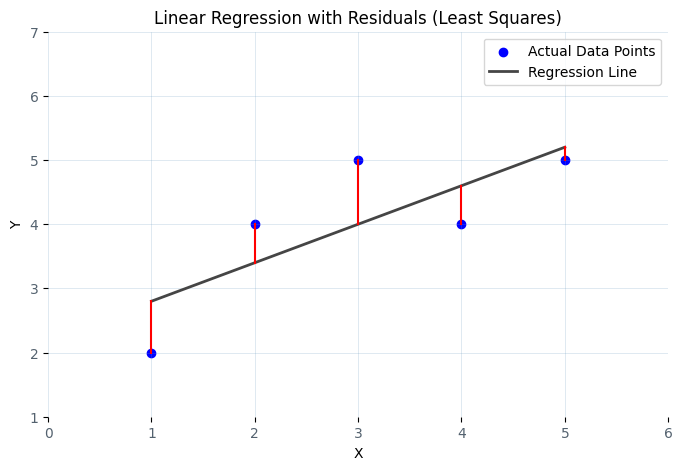


---

#### The Role in Supervised Learning

In supervised learning, a model is built from labeled data. In the context of regression, the model learns the relationship between the input features (such as a father's height) and the target variable (the son's height). Once trained, the model can then predict outcomes for new data points. The objective is to minimize the **vertical distance (errors or residuals)** between the predicted values (on the regression line) and the actual data points.


___
## 📊 Python Code: Plot Linear Regression with Residuals

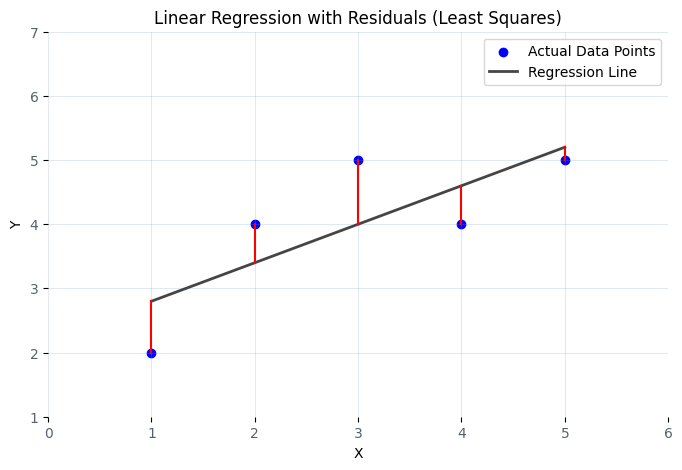

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# pip install scikit-learn
from sklearn.linear_model import LinearRegression


# Sample data points
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict values (y_hat)
y_pred = model.predict(X)

# Plot the data points
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data Points')

# Plot the regression line
plt.plot(X, y_pred, color="#454545", label='Regression Line', linewidth=2)

# Plot residuals (vertical red lines)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_pred[i]], color='red', linestyle='-', linewidth=1.5)

# Labels and Title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Residuals (Least Squares)')
plt.legend()


# Modern tick colors and font size
plt.xticks(color="#54626f", fontsize=10)
plt.yticks(color="#54626f", fontsize=10)
plt.xlim(min(X)-1, max(X)+1)
plt.ylim(min(y)-1, max(X)+2)

# Grid and minimalist style
plt.grid(True, linestyle='-', linewidth=0.4, alpha=0.4, color="#72a0c1")
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

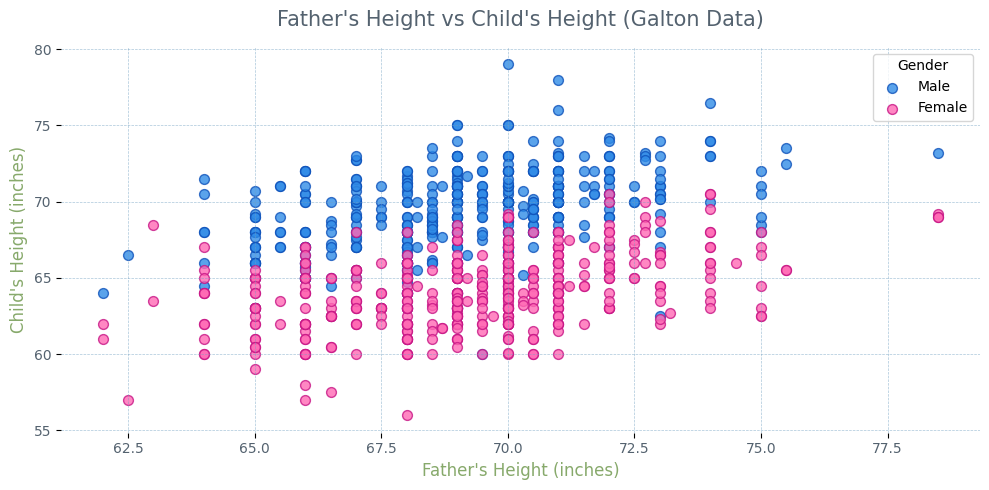

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("galton.csv")

# Modern font settings
plt.rcParams["font.family"] = "DejaVu Sans"

# Filter by gender
male_df = df[df["gender"] == "male"]
female_df = df[df["gender"] == "female"]

# Create the scatterplot
plt.figure(figsize=(10, 5))

# Male points
plt.scatter(male_df["father"], male_df["childHeight"],
            color="#318CE7", edgecolors='#0F52BA',
            s=50, alpha=0.8, label='Male')

# Female points
plt.scatter(female_df["father"], female_df["childHeight"],
            color="#FF69B4", edgecolors='#C71585',
            s=50, alpha=0.8, label='Female')

# Title and axis labels
plt.title("Father's Height vs Child's Height (Galton Data)",
          fontsize=15, color="#54626f", pad=15)
plt.xlabel("Father's Height (inches)", fontsize=12, color="#87a96b")
plt.ylabel("Child's Height (inches)", fontsize=12, color="#87a96b")

# Modern tick colors and font size
plt.xticks(color="#54626f", fontsize=10)
plt.yticks(color="#54626f", fontsize=10)

# Grid and minimalist style
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color="#72a0c1")
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add legend
plt.legend(title="Gender", fontsize=10)

plt.tight_layout()

# Show the plot
plt.show()


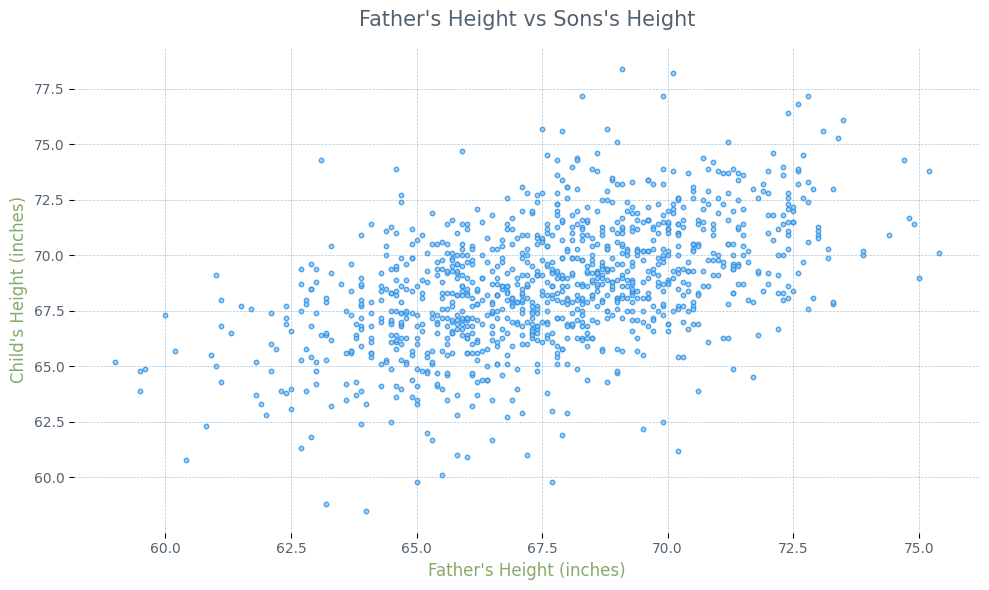

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading data into Python envrionmnet 
data = np.loadtxt('Pearson.txt')
# Getting height of only Father
father_height = data[:,0]
father_height = father_height.reshape(father_height.shape[0], 1)
# Getting height of only Son
son_height = data[:,1]
son_height = son_height.reshape(son_height.shape[0], 1)


# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(father_height, son_height, 
            color="#89cff0", edgecolors='#318ce7', 
            s=10, alpha=0.8)

# Title and axis labels
plt.title("Father's Height vs Sons's Height", fontsize=15, color="#54626f", pad=15)
plt.xlabel("Father's Height (inches)", fontsize=12, color="#87a96b")
plt.ylabel("Child's Height (inches)", fontsize=12, color="#87a96b")

# Modern tick colors and font size
plt.xticks(color="#54626f", fontsize=10)
plt.yticks(color="#54626f", fontsize=10)

# Grid and minimalist style
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color="#72a0c1")
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()

# Save as SVG
# plt.savefig("sat_scores_scatter_modern.svg", format="svg")

# Optional: show the plot
plt.show()

# Project 1:
Now we'll use scikit-learn in Python to create a linear regression model.

After that, we'll work on your own portfolio project exercise, and once completed, the solutions will be reviewed and discussed.